In [1]:
import os
path = "./"
files = os.listdir(path)
data_list = [f for f in files if os.path.isfile(os.path.join(path, f))]
print(data_list)


['中継機DR1型監視画面(_新大阪エリア・E-3_)_状態履歴3.xls', '中継機DR1型監視画面(_新大阪エリア・E-3_)_状態履歴4.xls', '中継機DR1型監視画面(_新大阪エリア・E-3_)_状態履歴2.xls', '中継機DR1型監視画面(_新大阪エリア・E-3_)_状態履歴8.xls', '中継機DR1型監視画面(_新大阪エリア・E-3_)_状態履歴8-30-1.xls', '中継機DR1型監視画面(_新大阪エリア・E-3_)_状態履歴8-30-8.xls', '中継機DR1型監視画面(_新大阪エリア・E-3_)_状態履歴1.xls', '中継機DR1型監視画面(_新大阪エリア・E-3_)_状態履歴7.xls', '中継機DR1型監視画面(_新大阪エリア・E-3_)_状態履歴5.xls', '中継機DR1型監視画面(_新大阪エリア・E-3_)_状態履歴6.xls', '中継機DR1型監視画面(_新大阪エリア・E-3_)_状態履歴8-30-5.xls', '中継機DR1型監視画面(_新大阪エリア・E-3_)_状態履歴9.xls', '中継機DR1型監視画面(_新大阪エリア・E-3_)_状態履歴11.xls', '中継機DR1型監視画面(_新大阪エリア・E-3_)_状態履歴8-30-7.xls', '中継機DR1型監視画面(_新大阪エリア・E-3_)_状態履歴8-30-6.xls', '中継機DR1型監視画面(_新大阪エリア・E-3_)_状態履歴10.xls']


In [12]:
import pandas as pd
import time 

place_codeA = [62]
place_codeB = [47772]
place_name = ["大阪"] 
# data_list = ["status1.xls","status2.xls","status3.xls","status4.xls","status5.xls","status6.xls","status7.xls","status8.xls","status9.xls","status10.xls","status11.xls"] 
df_list = []

import requests
from bs4 import BeautifulSoup #ダウンロードしてなかったらpipでできるからやってね。
import csv

flag = False
pre_year = 2021
nex_year = 2022
pre_month = 8
nex_month = 9
pre_day = 14
nex_day = 17
nex_min = ""

# URLで年と月ごとの設定ができるので%sで指定した英数字を埋め込めるようにします。
base_url = "http://www.data.jma.go.jp/obd/stats/etrn/view/10min_s1.php?prec_no=%s&block_no=%s&year=%s&month=%s&day=%s&view=p1"


#取ったデータをfloat型に変えるやつ。(データが取れなかったとき気象庁は"/"を埋め込んでいるから0に変える)
def str2float(str):
  try:
    return float(str)
  except:
    return 0.0


if __name__ == "__main__":
  #都市を網羅します
  for place in place_name:
    #最終的にデータを集めるリスト (下に書いてある初期値は一行目。つまり、ヘッダー。)
    All_list = [['年月日', '降水量(mm)','平均気温']]
    print(place)
    index = place_name.index(place)
    # for文で2016年~2021年までの11回。
    for exc in data_list:
      flag = False
      All_list = [['年月日', '降水量(mm)','平均気温']]
      for year in range(pre_year,nex_year):
        print(str(year) + "年")
        # その年の1月~12月の12回を網羅する。
        for month in range(pre_month,nex_month):
          #2つの都市コードと年と月を当てはめる。
          print(str(month) + "月")
          time.sleep(0.2)
          # 31日で終わる月に対する処理
          if month == 1 or month == 3 or month == 5 or month == 7 or month == 8 or month == 10 or month == 12:
            for day in range(pre_day, nex_day):
              r = requests.get(base_url%(place_codeA[index], place_codeB[index], year, month,day))
            
              r.encoding = r.apparent_encoding
              # まずはサイトごとスクレイピング
              soup = BeautifulSoup(r.text)
              # findAllで条件に一致するものをすべて抜き出します。
              # 今回の条件はtrタグでclassがmtxになってるものです。
              rows = soup.findAll('tr',class_='mtx')
              # 表の最初の1~4行目はカラム情報なのでスライスする。(indexだから初めは0だよ)
              # 【追記】2020/3/11 申し訳ございません。間違えてました。
              rows = rows[2:]
              # 1日〜最終日までの１行を網羅し、取得します。
              for row in rows:
              # 今度はtrのなかのtdをすべて抜き出します
                data = row.findAll('td')
                #１行の中には様々なデータがあるので全部取り出す。
                # ★ポイント
                rowData = [] #初期化
                rowData.append(str(year) + "/" + str(month) + "/" + str(day) + "/" + str(data[0].string))
                #rowData.append(str2float(data[1].string))
                #rowData.append(str2float(data[2].string))
                rowData.append(str2float(data[3].string))
                rowData.append(str2float(data[4].string))
                #rowData.append(str2float(data[6].string))
                #rowData.append(str2float(data[9].string))
                #次の行にデータを追加
                All_list.append(rowData)



          elif month == 4 or month == 6 or month == 9 or month == 11:
            for day in range(pre_day,nex_day):
              r = requests.get(base_url%(place_codeA[index], place_codeB[index], year, month,day))

              r.encoding = r.apparent_encoding
              soup = BeautifulSoup(r.text)
              rows = soup.findAll('tr',class_='mtx')
              rows = rows[2:]
              for row in rows:
                data = row.findAll('td')
                rowData = [] 
                rowData.append(str(year) + "/" + str(month) + "/" + str(day) + "/" + str(data[0].string))
                #rowData.append(str2float(data[1].string))
                #rowData.append(str2float(data[2].string))
                rowData.append(str2float(data[3].string))
                rowData.append(str2float(data[4].string))
                #rowData.append(str2float(data[6].string))
                #rowData.append(str2float(data[9].string))
                All_list.append(rowData)
          else:
            if year % 4 == 0:
              for day in range(pre_day, nex_day):
                r = requests.get(base_url%(place_codeA[index], place_codeB[index], year, month,day))

                r.encoding = r.apparent_encoding
                soup = BeautifulSoup(r.text)
                rows = soup.findAll('tr',class_='mtx')
                rows = rows[2:]
                for row in rows:
                  data = row.findAll('td')
                  rowData = [] 
                  rowData.append(str(year) + "/" + str(month) + "/" + str(day) + "/" + str(data[0].string))
                  #rowData.append(str2float(data[1].string))
                  #rowData.append(str2float(data[2].string))
                  rowData.append(str2float(data[3].string))
                  rowData.append(str2float(data[4].string))
                  #rowData.append(str2float(data[6].string))
                  #rowData.append(str2float(data[9].string))
                  All_list.append(rowData)
            else:
              for day in range(pre_day, nex_day):
                r = requests.get(base_url%(place_codeA[index], place_codeB[index], year, month,day))

                r.encoding = r.apparent_encoding
                soup = BeautifulSoup(r.text)
                rows = soup.findAll('tr',class_='mtx')
                rows = rows[2:]
                for row in rows:
                  data = row.findAll('td')
                  rowData = [] 
                  rowData.append(str(year) + "/" + str(month) + "/" + str(day) + "/" + str(data[0].string))
                  #rowData.append(str2float(data[1].string))
                  #rowData.append(str2float(data[2].string))
                  rowData.append(str2float(data[3].string))
                  rowData.append(str2float(data[4].string))
                  #rowData.append(str2float(data[6].string))
                  #rowData.append(str2float(data[9].string))
                  All_list.append(rowData)

      All_df=pd.DataFrame(data=All_list)
      #0行目をcolumns用に取り出し
      col=All_df.loc[0,:]

      #0行目をcolumnsにしたDataFrame
      all_data_df_p=pd.DataFrame(data=All_list, columns=col)
      df=all_data_df_p

      #DataFrameの作成と確認
      all_data_df=df.drop(df.index[[0]])

      print(type(exc))
      # 全てのシートを取り込み
      df = pd.read_excel(exc, sheet_name=None)
      # シート名を取り込み
      df_stayleseet_key = df.keys()
      # 1シートごとに読み込みし直す
      for stayle_key in df_stayleseet_key:
        print(stayle_key)
        df = pd.read_excel(exc , sheet_name=stayle_key)
        df = df.iloc[[4,6,7], 1:]

        t = df.iloc[0,0]
        old_ms = t[36:38]
        new_ms = t[55:57]
        if(int(new_ms) - int(old_ms) < 0):
          flag = True
        t = t[25:35]

        if pre_day < 10 and pre_month < 10:
          t = t[0:5] + t[6:8] + t[9]
        elif pre_day < 10 and pre_month >= 10:
          t = t[0:5] + t[6:9] + t[9]
        elif pre_day >= 10 and pre_month < 10:
          t = t[0:5] + t[6:8] + t[8:11]
        else:
          t = t[0:5] + t[6:9] + t[8:11]


        df = df.iloc[:,1:]

        target = ' ' 
        for i in range(len(df.columns)):
          temp = t + '/' + df.iloc[0,i]
          idx = temp.find(target) - 2
          df.iloc[0,i] = temp[:idx]

        df = df.T

        df = df.rename(columns={4: '年月日', 6:'LCX上り入力', 7:'LCX下り入力'})

        print(len(df))

        if(flag):
          for i in range(len(df)):
            temp = df["年月日"][i]
            if int(temp[10:12]) < 10:
              df["年月日"][i] = temp[0:7] + str(int(temp[7:9]) + 1) + temp[9:15]

        #print(df)

        result = pd.merge(all_data_df, df,  
            how="inner", on = "年月日")
        #print(all_data_df)
        #print(result)
        df_list.append(result)

for i in range(len(df_list)-1):
  print(i)
  if(i == 0):
    df_new = pd.concat(
    [df_list[i], df_list[i+1]],
    axis=0,
    ignore_index=True)
  else:
    df_new = pd.concat(
    [df_new, df_list[i+1]],
    axis=0,
    ignore_index=True
)
    
df_new.sort_values('年月日', inplace=True)
df_new

大阪
2021年
8月
<class 'str'>
WARNING *** file size (615196) not 512 + multiple of sector size (512)
P.1
WARNING *** file size (615196) not 512 + multiple of sector size (512)
250
P.2
WARNING *** file size (615196) not 512 + multiple of sector size (512)
110
2021年
8月
<class 'str'>
WARNING *** file size (615224) not 512 + multiple of sector size (512)
P.1
WARNING *** file size (615224) not 512 + multiple of sector size (512)
250
P.2
WARNING *** file size (615224) not 512 + multiple of sector size (512)
110
2021年
8月
<class 'str'>
WARNING *** file size (615241) not 512 + multiple of sector size (512)
P.1
WARNING *** file size (615241) not 512 + multiple of sector size (512)
250
P.2
WARNING *** file size (615241) not 512 + multiple of sector size (512)
110
2021年
8月


/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


<class 'str'>
P.1
250
P.2
111
2021年
8月
<class 'str'>
P.1
250
P.2
110
2021年
8月
<class 'str'>
WARNING *** file size (615319) not 512 + multiple of sector size (512)
P.1
WARNING *** file size (615319) not 512 + multiple of sector size (512)
250
P.2
WARNING *** file size (615319) not 512 + multiple of sector size (512)
110
2021年
8月
<class 'str'>
WARNING *** file size (615144) not 512 + multiple of sector size (512)
P.1
WARNING *** file size (615144) not 512 + multiple of sector size (512)
250
P.2
WARNING *** file size (615144) not 512 + multiple of sector size (512)
110
2021年
8月
<class 'str'>
WARNING *** file size (615253) not 512 + multiple of sector size (512)
P.1
WARNING *** file size (615253) not 512 + multiple of sector size (512)
250
P.2
WARNING *** file size (615253) not 512 + multiple of sector size (512)
110
2021年
8月
<class 'str'>
P.1
250
P.2
111
2021年
8月
<class 'str'>
P.1
250
P.2
110
2021年
8月
<class 'str'>
P.1
250
P.2
110
2021年
8月
<class 'str'>
WARNING *** file size (615259) not 

,年月日,降水量(mm),平均気温,LCX上り入力,LCX下り入力
358,2021/8/14/00:10,0.0,26.0,-20.30,-19.20
359,2021/8/14/00:20,0.0,25.9,-20.40,-19.20
360,2021/8/14/00:30,0.0,25.9,-20.40,-19.20
361,2021/8/14/00:40,0.0,25.6,-20.50,-19.20
362,2021/8/14/00:50,0.5,25.5,-20.40,-19.20
...,...,...,...,...,...
212,2021/8/16/15:10,0.0,27.2,-19.50,-19.40
177,2021/8/16/15:20,0.0,27.3,-19.30,-19.40
213,2021/8/16/15:20,0.0,27.3,-19.30,-19.40
178,2021/8/16/15:30,0.0,27.7,-19.30,-19.30


In [13]:
# データ整形
df = df_new.drop('年月日', axis=1)
df = df.drop('LCX下り入力', axis=1)
df = df.astype("float32")
print(df)

import numpy as np

#平均気温
templature = df[["平均気温"]].values
templature = templature.reshape(-1)
templature = templature.astype(np.float64)
# templature[:] *= 10

#降水量
rain = df[["降水量(mm)"]].values
rain = rain.reshape(-1)
rain = rain.astype(np.float64)
# rain[:] *= 10

#LCX上り入力
lcxup = df[["LCX上り入力"]].values
lcxup = lcxup.reshape(-1)
lcxup = lcxup.astype(np.float64)
# lcxup[:] *= 1.2

     降水量(mm)       平均気温    LCX上り入力
358      0.0  26.000000 -20.299999
359      0.0  25.900000 -20.400000
360      0.0  25.900000 -20.400000
361      0.0  25.600000 -20.500000
362      0.5  25.500000 -20.400000
..       ...        ...        ...
212      0.0  27.200001 -19.500000
177      0.0  27.299999 -19.299999
213      0.0  27.299999 -19.299999
178      0.0  27.700001 -19.299999
214      0.0  27.700001 -19.299999

[415 rows x 3 columns]


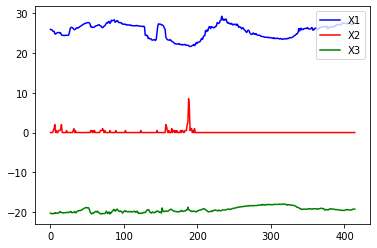

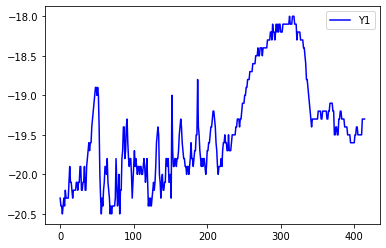

In [14]:
#ライブラリインポート
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt

#データ準備
xdeg=414 # データの数が増えたらその分これも増やす必要あり
x = np.arange(0,xdeg+1)
X1=templature
X2=rain
X3=lcxup
Y1=lcxup
X1.shape

#入力データの可視化
plt.plot(range(0, len(x)), X1, color="b", label="X1")
plt.plot(range(0, len(x)), X2, color="r", label="X2")
plt.plot(range(0, len(x)), X3, color="g", label="X3")
#plt.plot(range(0, len(x)), X4, color="y", label="X4")
plt.legend()
plt.show()
plt.plot(range(0, len(x)), Y1, color="b", label="Y1")
#plt.plot(range(0, len(x)), Y2, color="r", label="Y2")
plt.legend()
plt.show()

#LSTM用にデータの前処理
X_list=[X1,X2,X3]
Y_list=[Y1]
Xdata=[]
Ydata=[]
look_back=9   # look_back数ぶん前のデータを用いて、look_back+1個目のデータを予測する
# 例えば、10日間のデータが1日10個で合計100個あったとする
# そして3日間のデータを用いて、次の日のデータを予測したい時
# look_backを(10*3)=30に設定すれば良い
# 予測先はlook_back+1より31個目のデータを予測する
for i in range(len(x)-look_back):
    Xtimedata=[]
    # Xdataにlook_back数個にまとめたXtimedataのリスト内容を代入する
    for j in range(len(X_list)):
        Xtimedata.append(X_list[j][i:i+look_back])
    Xtimedata=np.array(Xtimedata)
    Xtimedata=Xtimedata.transpose()
    Xdata.append(Xtimedata)
    Ytimedata=[]
    # Ydataにlook_back+1個目のデータを代入する、つまりlook_back数分まとめたデータからlook_back+1個目のデータを予測する！
    for j in range(len(Y_list)):
        Ytimedata.append(Y_list[j][i+look_back])
    Ydata.append(Ytimedata)
Xdata=np.array(Xdata)
Ydata=np.array(Ydata)

(406, 9, 3)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 4)                 128       
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
21/21 [==============================] - 2s 26ms/step - loss: 364.5294 - val_loss: 355.9773
Epoch 2/1000
21/21 [==============================] - 0s 7ms/step - loss: 360.8213 - val_loss: 352.9900
Epoch 3/1000
21/21 [==============================] - 0s 6ms/step - loss: 356.9417 - val_loss: 348.7091
Epoch 4/1000
21/21 [==============================] - 0s 9ms/step - loss: 352.3983 - val_loss: 344.5949
Epoch 5/1000
21/21 [===============

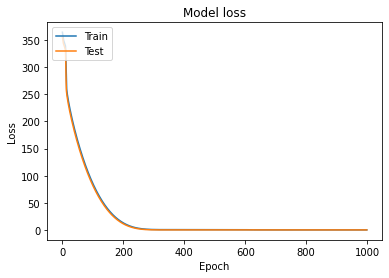

3/3 [==============================] - 0s 5ms/step


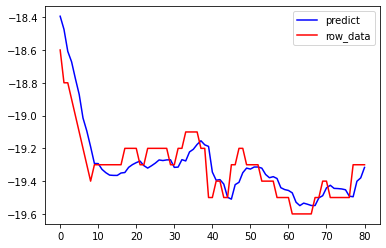

In [15]:
#LSTMモデルの構築⇒学習開始
print(Xdata.shape)
Xdim=Xdata.shape[2]
Ydim=Ydata.shape[1]
validation_split_rate=0.2
model = Sequential()
model.add(LSTM(4, input_shape=(look_back,Xdim)))
model.add(Dense(Ydim))
model.compile(loss="mean_squared_error", optimizer=Adam(lr=0.001))
model.summary()
history=model.fit(Xdata,Ydata,batch_size=16,epochs=1000,validation_split=validation_split_rate)

#学習結果の可視化
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#精度検証
Xdata_validation=Xdata[-int(len(Xdata)*(validation_split_rate)):]
Ydata_validation=Ydata[-int(len(Ydata)*(validation_split_rate)):]
Predictdata = model.predict(Xdata_validation)

plt.plot(range(0, len(Predictdata)),Predictdata[:,0], color="b", label="predict")
plt.plot(range(0, len(Ydata_validation)),Ydata_validation[:,0], color="r", label="row_data")
plt.legend()
plt.show()

# 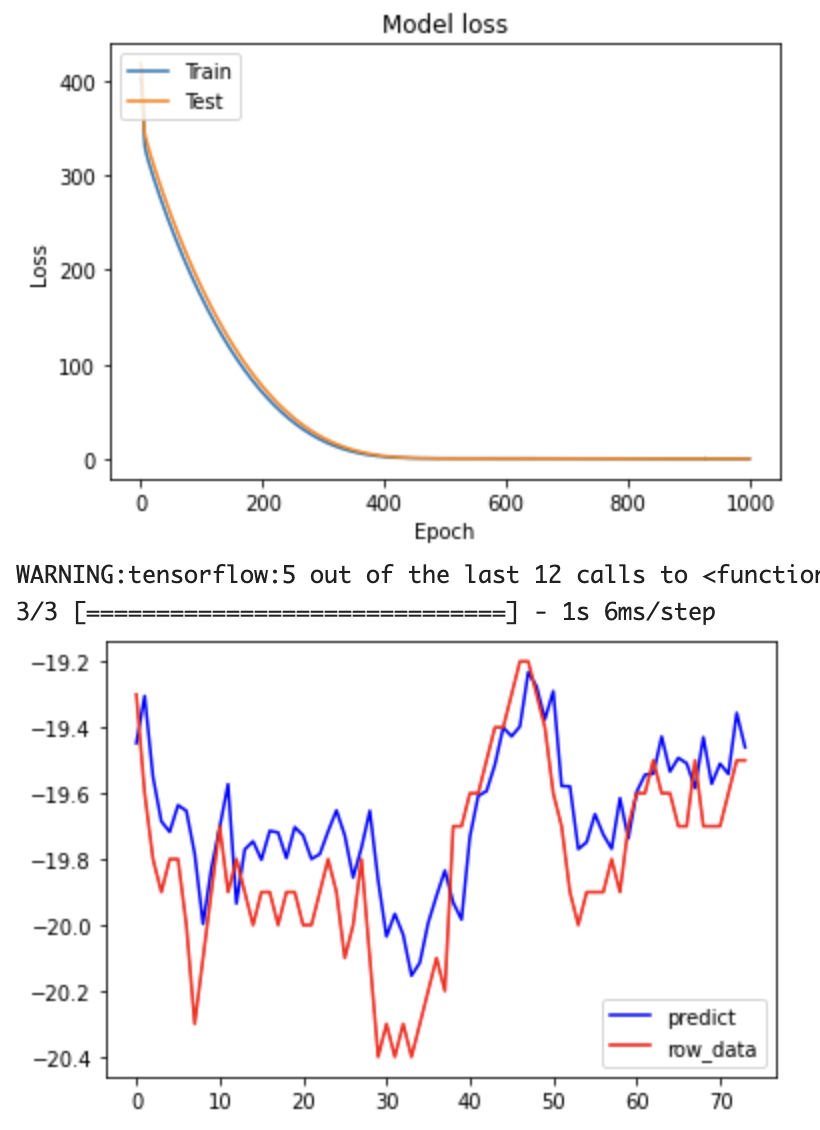学習結果

8/14~8/16までのデータ計379個のデータを使って、look_backは9、1000epoch回した結果、高精度になった。500epochほどで収束しているので、600epochぐらいの学習でいいかも

In [ ]:
from tensorflow import keras
# モデルを保存
model.save("my_model")

3/3 [==============================] - 1s 5ms/step


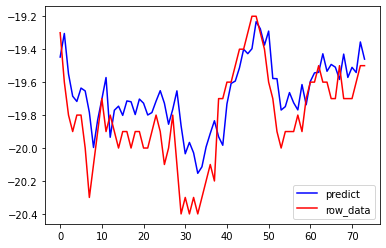

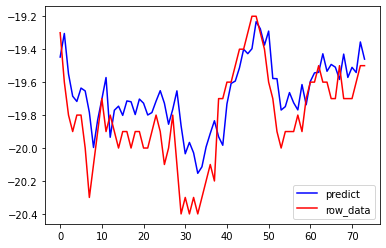

In [ ]:
# It can be used to reconstruct the model identically.
reconstructed_model = keras.models.load_model("my_model")

# # Let's check:
# np.testing.assert_allclose(
#     model.predict(Xdata_validation), reconstructed_model.predict(Xdata_validation)
# )
Predictdata = model.predict(Xdata_validation)
rePredictdata = reconstructed_model.predict(Xdata_validation)

# 学習したモデル
plt.plot(range(0, len(Predictdata)),Predictdata[:,0], color="b", label="predict")
plt.plot(range(0, len(Ydata_validation)),Ydata_validation[:,0], color="r", label="row_data")
plt.legend()
plt.show()

# 保存して再びロードしたモデル
plt.plot(range(0, len(Predictdata)),Predictdata[:,0], color="b", label="predict")
plt.plot(range(0, len(Ydata_validation)),Ydata_validation[:,0], color="r", label="row_data")
plt.legend()
plt.show()

###以下のコードはサイトに載っていたソースコード
サイトURL[https://www.higashisalary.com/entry/lstm-some-inout-data]

In [ ]:
#ライブラリインポート
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt

#データ準備
xdeg=1440
x = np.arange(0,xdeg+1)
sinx=np.sin(2*np.pi*x/360)+np.random.rand(len(x))/20
sin2x=np.sin(2*2*np.pi*x/360)+np.random.rand(len(x))/20
cosx=np.cos(2*np.pi*x/360)+np.random.rand(len(x))/20
cos2x=np.cos(2*2*np.pi*x/360)+np.random.rand(len(x))/20
X1=sinx
X2=cosx
X3=sin2x
X4=cos2x
Y1=X1+X2+X3+X4
Y2=X1-X2+X3-X4

#入力データの可視化
plt.plot(range(0, len(x)), X1, color="b", label="X1")
plt.plot(range(0, len(x)), X2, color="r", label="X2")
plt.plot(range(0, len(x)), X3, color="g", label="X3")
plt.plot(range(0, len(x)), X4, color="y", label="X4")
plt.legend()
plt.show()
plt.plot(range(0, len(x)), Y1, color="b", label="Y1")
plt.plot(range(0, len(x)), Y2, color="r", label="Y2")
plt.legend()
plt.show()

#LSTM用にデータの前処理
X_list=[X1,X2,X3,X4]
Y_list=[Y1,Y2]
Xdata=[]
Ydata=[]
look_back=5
for i in range(len(x)-look_back):
    Xtimedata=[]
    for j in range(len(X_list)):
        Xtimedata.append(X_list[j][i:i+look_back])
    Xtimedata=np.array(Xtimedata)
    Xtimedata=Xtimedata.transpose()
    Xdata.append(Xtimedata)
    Ytimedata=[]
    for j in range(len(Y_list)):
        Ytimedata.append(Y_list[j][i+look_back])
    Ydata.append(Ytimedata)
Xdata=np.array(Xdata)
Ydata=np.array(Ydata)

#LSTMモデルの構築⇒学習開始
Xdim=Xdata.shape[2]
Ydim=Ydata.shape[1]
validation_split_rate=0.2
model = Sequential()
model.add(LSTM(4, input_shape=(look_back,Xdim)))
model.add(Dense(Ydim))
model.compile(loss="mean_squared_error", optimizer=Adam(lr=0.001))
model.summary()
history=model.fit(Xdata,Ydata,batch_size=16,epochs=100,validation_split=validation_split_rate)

#学習結果の可視化
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#精度検証
Xdata_validation=Xdata[-int(len(Xdata)*(validation_split_rate)):]
Ydata_validation=Ydata[-int(len(Ydata)*(validation_split_rate)):]
Predictdata = model.predict(Xdata_validation)
plt.plot(range(0, len(Predictdata)),Predictdata[:,0], color="b", label="predict")
plt.plot(range(0, len(Ydata_validation)),Ydata_validation[:,0], color="r", label="row_data")
plt.legend()
plt.show()

## CNNを利用した時系列予測

In [ ]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# pytorchのインストール
!pip install torch===1.7.1 torchvision===0.8.2 torchaudio===0.7.2 -f https://download.pytorch.org/whl/torch_stable.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.8/776.8 MB 997.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 59.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 61.8 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 1.13.1+cu116
    Uninstalling torch-1.13.1+cu116:
      Successfully uninstalled torch-1.13.1+cu116
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.14.1+cu116
    Uninstalling torchvision-0.14.1+cu116:
      Successfully uninstalled torchvision-0.14.1+cu116
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 0.13.1+cu116
    Uninstalling torchaudio-0.13.1+cu116:
      Successfully uninstalled torchaudio-0.13.1+cu116
ERROR: pip's dependency resolver does no

In [ ]:
# NeuralProphetのインストール
!pip install neuralprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.0/115.0 KB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 KB 7.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 706.5/706.5 KB 47.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.0/232.0 KB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 419.6/419.6 KB 37.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.4/887.4 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 KB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 85.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# ライブラリーの読み込み
import pandas as pd                             #基本ライブラリー
from prophet import Prophet                     #Prophet
from neuralprophet import NeuralProphet         #NeuralProphet
from sklearn.metrics import mean_absolute_error #評価指標MAE
from statistics import mean                     #平均値の計算
import matplotlib.pyplot as plt                 #グラフ描写

In [ ]:
# グラフのスタイル
plt.style.use('ggplot')
# グラフサイズ設定
plt.rcParams['figure.figsize'] = [12, 9]

In [ ]:
# Peyton ManningのWikipediaのPVのデータセットの内容
result.info() #データセット情報
result.head() #上位10個のデータ

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   年月日      25 non-null     object
 1   降水量(mm)  25 non-null     object
 2   平均気温     25 non-null     object
 3   LCX上り入力  25 non-null     object
 4   LCX下り入力  25 non-null     object
dtypes: object(5)
memory usage: 1.2+ KB


,年月日,降水量(mm),平均気温,LCX上り入力,LCX下り入力
0,2021/4/1/08:40,0.0,13.4,-17.60,-17.50
1,2021/4/1/08:50,0.0,14.1,-17.70,-17.50
2,2021/4/1/09:00,0.0,14.3,-17.70,-17.60
3,2021/4/1/09:10,0.0,14.5,-17.70,-17.50
4,2021/4/1/09:20,0.0,14.7,-17.70,-17.60


WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 38477 missing from current font.
  font.set_text(s, 0.0, flags=flags)

  font.set_text(s, 0.0, flags=flags)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27700 missing from current font.
  font.set_text(s, 0.0, flags=flags)

  font.set_text(s, 0.0, flags=flags)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 37327 missing from current font.
  font.set_text(s, 0.0, flags=flags)

  font.set_text(s, 0.0, flags=flags)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24179 missing from current font.
  font.set_text(s, 0.0, flags=flags)

  font.set_text(s, 0.0, flags=flags)

WARN

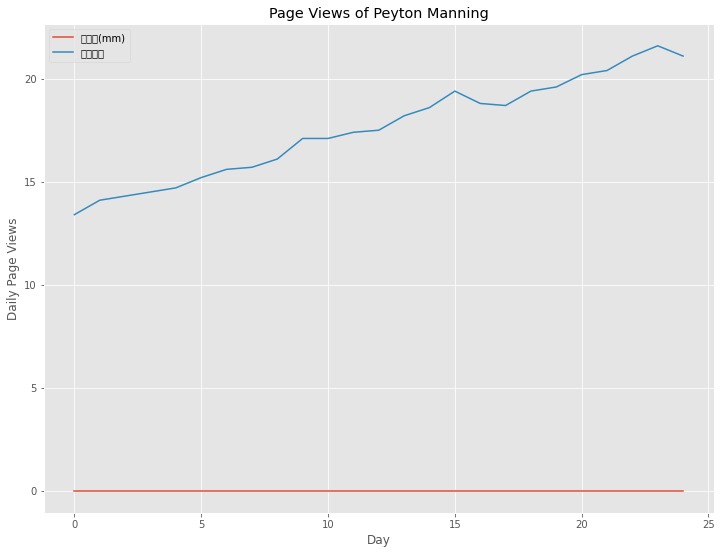

In [ ]:
# Peyton ManningのWikipediaのPVのプロット
result.plot()
plt.title('Page Views of Peyton Manning') #グラフタイトル
plt.ylabel('Daily Page Views')             #タテ軸のラベル
plt.xlabel('Day')                          #ヨコ軸のラベル
plt.show()

In [ ]:
# Peyton ManningのWikipediaのPV
# Prophet 予測モデル構築
df_prophet_model = Prophet(seasonality_mode='multiplicative')

In [ ]:
df_prophet_model.fit(result)

ValueError: ignored

# 重回帰を利用した時系列予測

### 学習データの取得 (登りのLCXの入力)

In [ ]:
result

,年月日,降水量(mm),平均気温,LCX上り入力,LCX下り入力
0,2021/4/1/08:40,0.0,13.4,-17.60,-17.50
1,2021/4/1/08:50,0.0,14.1,-17.70,-17.50
2,2021/4/1/09:00,0.0,14.3,-17.70,-17.60
3,2021/4/1/09:10,0.0,14.5,-17.70,-17.50
4,2021/4/1/09:20,0.0,14.7,-17.70,-17.60
5,2021/4/1/09:30,0.0,15.2,-17.80,-17.50
6,2021/4/1/09:40,0.0,15.6,-17.80,-17.60
7,2021/4/1/09:50,0.0,15.7,-17.80,-17.60
8,2021/4/1/10:00,0.0,16.1,-17.90,-17.60
9,2021/4/1/10:10,0.0,17.1,-17.80,-17.50


In [ ]:
train_x = result.loc[: ,['降水量(mm)','平均気温']]
train_y = result.loc[:,['LCX上り入力']] 

In [ ]:
train_x

,降水量(mm),平均気温
0,0.0,13.4
1,0.0,14.1
2,0.0,14.3
3,0.0,14.5
4,0.0,14.7
5,0.0,15.2
6,0.0,15.6
7,0.0,15.7
8,0.0,16.1
9,0.0,17.1


In [ ]:
train_y

,LCX上り入力
0,-17.60
1,-17.70
2,-17.70
3,-17.70
4,-17.70
5,-17.80
6,-17.80
7,-17.80
8,-17.90
9,-17.80


###実際に予測する

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression(random_state=0).fit(train_x, train_y)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

  y = column_or_1d(y, warn=True)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as sho

In [ ]:
clf.predict(train_x)

array(['-17.70', '-17.70', '-17.70', '-17.70', '-17.70', '-17.70',
       '-17.80', '-17.80', '-17.80', '-17.90', '-17.90', '-17.90',
       '-17.90', '-18.00', '-18.00', '-18.00', '-18.00', '-18.00',
       '-18.00', '-18.00', '-18.00', '-18.00', '-18.00', '-18.10',
       '-18.00'], dtype=object)